<a href="https://colab.research.google.com/github/ClaudioCazzetta/VISIONE-E-PERCEZIONE/blob/Rox/TutorialObjectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial multimediale Objectron Mediapipe

---
*Cazzetta Claudio e Valanzano Rocchina*

Installazione mediapipe

In [1]:
!pip install opencv-python mediapipe

     |████████████████████████████████| 32.7 MB 237 kB/s 


import Github project

In [2]:
!git clone https://github.com/ClaudioCazzetta/VISIONE-E-PERCEZIONE.git

Cloning into 'VISIONE-E-PERCEZIONE'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 45 (delta 11), reused 32 (delta 3), pack-reused 0
Unpacking objects: 100% (45/45), done.


import delle dipendenze

In [30]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
import os

Setup di mediapipe

In [31]:
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron

Link utili per le immagini disponibili

Immagine1: "/content/VISIONE-E-PERCEZIONE/media/tazza1.jpg"

Immagine1: "/content/VISIONE-E-PERCEZIONE/media/tazza3.jpg"

Immagine1: "/content/VISIONE-E-PERCEZIONE/media/tazza6.jpg"

Immagine2: "/content/VISIONE-E-PERCEZIONE/media/tazza7.jpg"

Detection e tracciamento immagini 2D

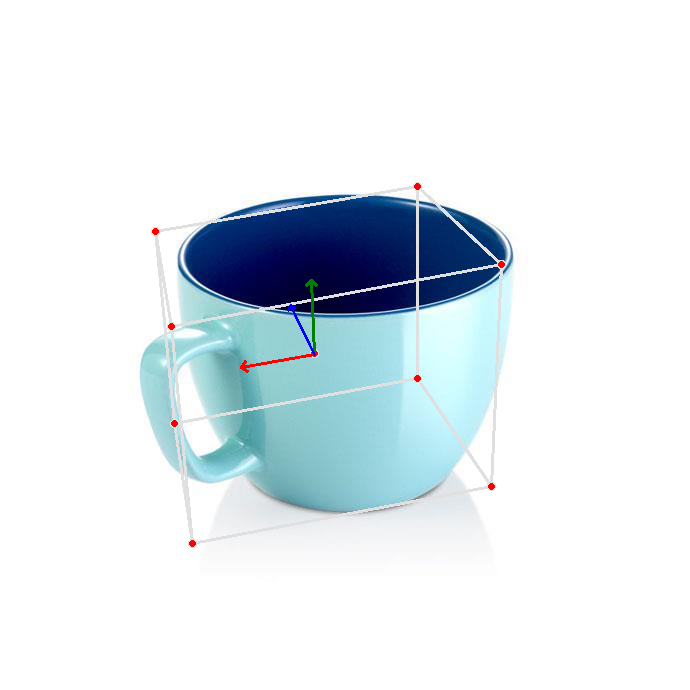

In [32]:
with mp_objectron.Objectron(static_image_mode=True,
                            max_num_objects=1,
                            min_detection_confidence=0.5,
                            model_name='Cup') as objectron:
  
    image = cv2.imread("/content/VISIONE-E-PERCEZIONE/media/tazza7.jpg")
    # Conversione dell'immagine BGR a RGB e processamento con MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Disegnare landmarks della box.
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation,
                           detected_object.translation)
      os.chdir("/content/VISIONE-E-PERCEZIONE/media/")
      cv2.imwrite('annotated_image' + '.jpg', annotated_image)

      cv2_imshow(annotated_image)